# Choropleth Mapping 


## PySAL Viz Module

The  mapping module in PySAL is organized around three main layers:

- A lower-level layer that reads polygon, line and point shapefiles and returns a Matplotlib collection.
- A medium-level layer that performs some usual transformations on a Matplotlib object (e.g. color code polygons according to a vector of values).
- A higher-level layer intended for end-users for particularly useful cases and style preferences pre-defined (e.g. Create a choropleth).

In [1]:
%matplotlib inline
import numpy as np
import pysal as ps
import random as rdm
from pysal.contrib.viz import mapping as maps
from pylab import *

### Lower-level component

This includes basic functionality to read spatial data from a file (currently only shapefiles supported) and produce rudimentary Matplotlib objects. The main methods are:

- map_poly_shape: to read in polygon shapefiles
- map_line_shape: to read in line shapefiles
- map_point_shape: to read in point shapefiles

These methods all support an option to subset the observations to be plotted (very useful when missing values are present). They can also be overlaid and combined by using the `setup_ax` function. the resulting object is very basic but also very flexible so, for minds used to matplotlib this should be good news as it allows to modify pretty much any property and attribute.

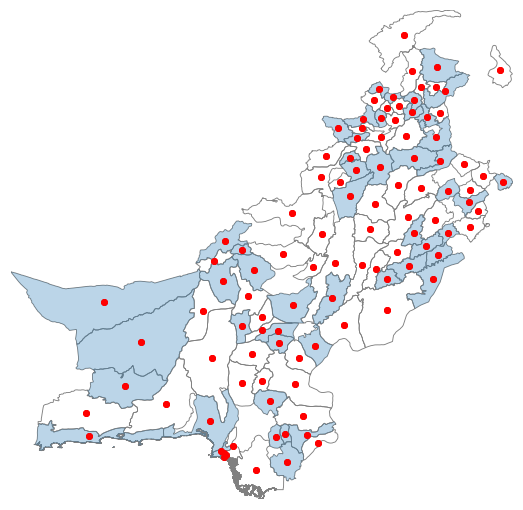

In [3]:
shp_link = r"C:\Users\HAMMA\Desktop\gdp project\2012-2015\pak_dist4.shp"
shp = ps.open(shp_link)
some = [bool(rdm.getrandbits(1)) for i in ps.open(shp_link)]

fig = figure(figsize=(9,9))

base = maps.map_poly_shp(shp)
base.set_facecolor('none')
base.set_linewidth(0.9)
base.set_edgecolor('0.5')
some = maps.map_poly_shp(shp, which=some)
some.set_alpha(0.3)
some.set_linewidth(0.)
cents = np.array([poly.centroid for poly in ps.open(shp_link)])
pts = scatter(cents[:, 0], cents[:, 1])
pts.set_color('red')

ax = maps.setup_ax([base, some, pts], [shp.bbox, shp.bbox, shp.bbox])
fig.add_axes(ax)
show()

### Medium-level component

This layer comprises functions that perform usual transformations on matplotlib objects, such as color coding objects (points, polygons, etc.) according to a series of values. This includes the following methods:

- `base_choropleth_classless`
- `base_choropleth_unique`
- `base_choropleth_classif`

#### Example

calling plt.show()


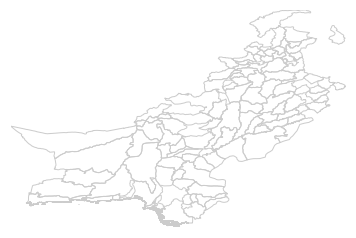

In [6]:
maps.plot_poly_lines(r"C:\Users\HAMMA\Desktop\gdp project\2012-2015\pak_dist4.shp")

### Higher-level component

This currently includes the following end-user functions:

- `plot_poly_lines`: very quick shapfile plotting

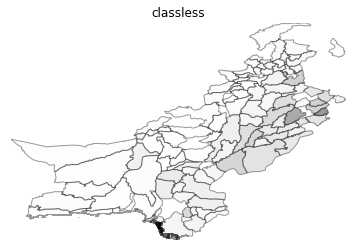

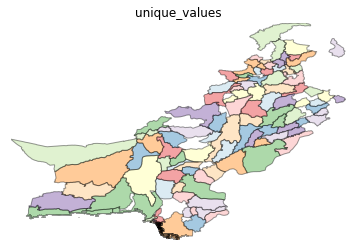

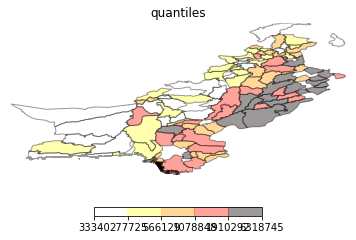

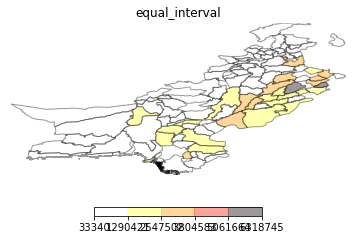

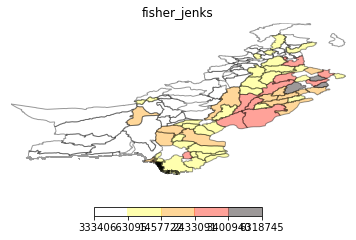

In [7]:
shp_link = r"C:\Users\HAMMA\Desktop\gdp project\2012-2015\pak_dist4.shp"
values = np.array(ps.open(r"C:\Users\HAMMA\Desktop\gdp project\2012-2015\pak_dist4.dbf").by_col('F1981__pop'))

types = ['classless', 'unique_values', 'quantiles', 'equal_interval', 'fisher_jenks']
for typ in types:
    maps.plot_choropleth(shp_link, values, typ, title=typ)

## GeoPandas

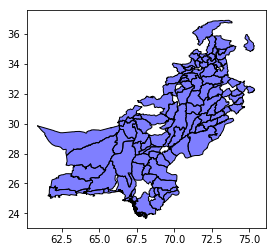

In [8]:
import geopandas as gpd
shp_link = r"C:\Users\HAMMA\Desktop\gdp project\2012-2015\pak_dist4.shp"
tx = gpd.read_file(shp_link)
tx.plot(color='blue')

In [9]:
type(tx)

geopandas.geodataframe.GeoDataFrame

C:\Users\HAMMA\Anaconda2\lib\site-packages\geopandas\geodataframe.py:447: UserWarning: Unrecognized scheme "NATURAL BREAKS". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


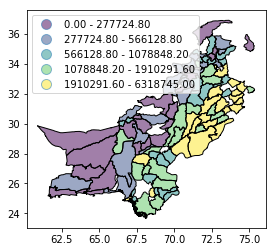

In [10]:
tx.plot(column='F1981__pop', scheme='NATURAL BREAKS',legend=True,) # uses pysal classifier under the hood

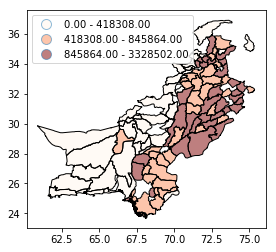

In [13]:
tx.plot(column='F1998__pop', scheme='QUANTILES', k=3, cmap='OrRd',legend=True) # we need a continuous color map

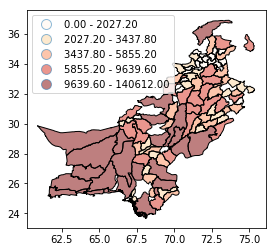

In [15]:
tx.plot(column='Area_1', scheme='QUANTILES', k=5, cmap='OrRd',legend=True) # bump up to quintiles

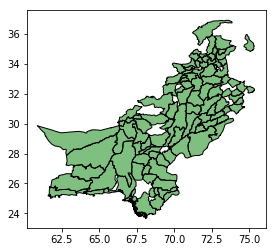

In [16]:
tx.plot(color='green') # explore options, polygon fills

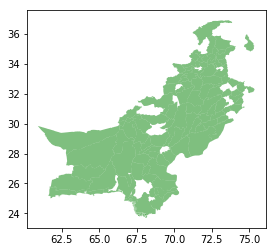

In [17]:
tx.plot(color='green',linewidth=0) # border

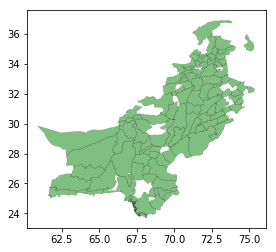

In [18]:
tx.plot(color='green',linewidth=0.1) # border

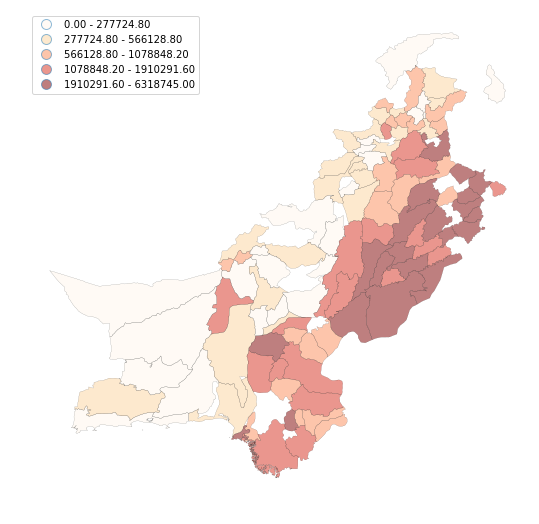

In [25]:
import matplotlib.pyplot as plt # make plot larger

f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(column='F1981__pop', scheme='QUANTILES',legend=True, k=5, cmap='OrRd', linewidth=0.1, ax=ax)
ax.set_axis_off()
plt.show()

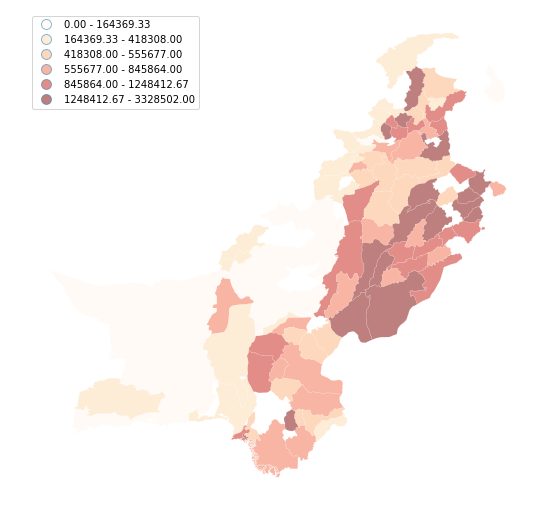

In [24]:
f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(column='F1998__pop', scheme='QUANTILES', k=6, cmap='OrRd', linewidth=0.1, ax=ax, legend=True,edgecolor='white')
ax.set_axis_off()
plt.show()

In [27]:
# ok, let's work around to get deciles
q10 = ps.Quantiles(tx.Pop_Sq_Km,k=10)
q10.bins

array([  1.96800000e+01,   4.66800000e+01,   9.78400000e+01,
         1.46060000e+02,   2.12200000e+02,   2.70820000e+02,
         4.05400000e+02,   4.99880000e+02,   7.34460000e+02,
         1.97550000e+04])

In [28]:
q10.yb

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 4, 1, 2, 0, 2, 6, 0, 1, 1, 1, 1, 1, 0,
       7, 4, 3, 3, 2, 4, 2, 8, 4, 3, 3, 7, 5, 6, 2, 5, 6, 3, 5, 1, 7, 6, 5,
       6, 9, 8, 9, 8, 9, 0, 5, 3, 5, 3, 4, 6, 2, 9, 6, 7, 9, 8, 6, 8, 9, 8,
       9, 8, 8, 7, 7, 9, 7, 8, 7, 4, 4, 5, 8, 3, 3, 4, 7, 4, 2, 8, 1, 2, 2,
       9, 9, 9, 7, 5, 5, 6, 6, 3, 3, 4, 2, 6, 5, 4])

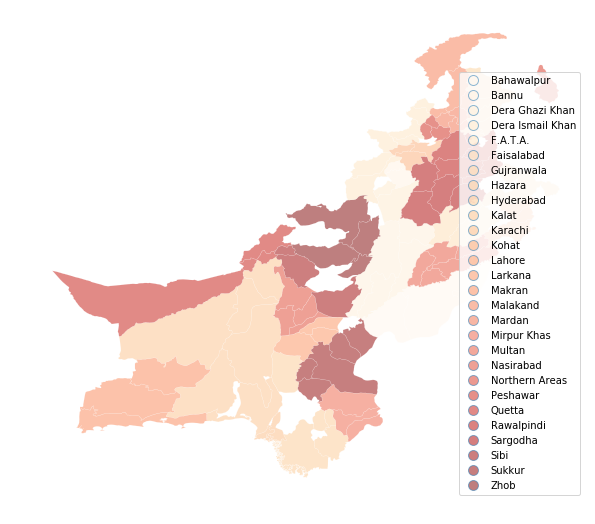

In [76]:
f, ax = plt.subplots(1, figsize=(10, 9))
tx.assign(cl=q10.yb).plot(column='NAME_2', categorical=True,k=10, cmap='OrRd', linewidth=0.1, ax=ax, edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

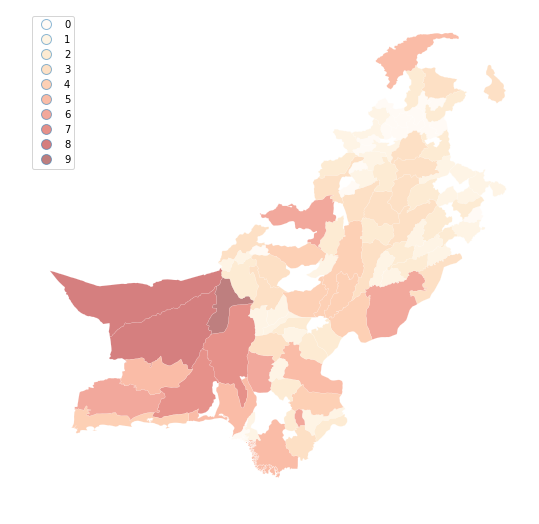

In [31]:
Area = ps.Fisher_Jenks(tx.Area_1,k=10)
Area.bins
#labels = ["%0.1f"%l for l in fj10.bins]
#labels
f, ax = plt.subplots(1, figsize=(9, 9))
tx.assign(cl=Area.yb).plot(column='cl', categorical=True,k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [32]:
Area.adcm

68248.0

In [33]:
q10.adcm

38655.199999999997

In [34]:
q5 = ps.Quantiles(tx.Male_1,k=5)


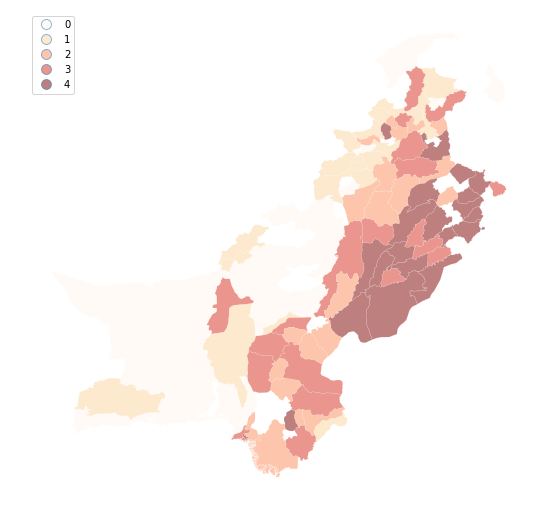

In [35]:
f, ax = plt.subplots(1, figsize=(9, 9))
tx.assign(cl=q5.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

## Cartopy

Next we turn to [cartopy](http://scitools.org.uk/cartopy/).

In [45]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

reader = shpreader.Reader(r"C:\Users\HAMMA\Desktop\gdp project\2012-2015\pak_dist4.shp")

In [46]:
def choropleth(classes, colors, reader, legend=None, title=None, fileName=None, dpi=600):
    ax = plt.axes([0,0,1,1], projection=ccrs.LambertConformal())
    ax.set_extent([-108, -93, 38, 24], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    if title:
        plt.title(title)
    ax.set_extent([-108, -93, 38, 24], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    
    for i,state in enumerate(reader.geometries()):
        facecolor = colors[classes[i]]
        #facecolor = 'red'
        edgecolor = 'black'
        ax.add_geometries([state], ccrs.PlateCarree(), 
                         facecolor=facecolor, edgecolor=edgecolor)
        
    leg = [ mpatches.Rectangle((0,0),1,1, facecolor=color) for color in colors]
    if legend:
        plt.legend(leg, legend, loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)
    if fileName:
        plt.savefig(fileName, dpi=dpi)
    plt.show()

In [68]:
Pakistan = values

In [69]:
bins_q5 = ps.Quantiles(Pakistan, k=5)

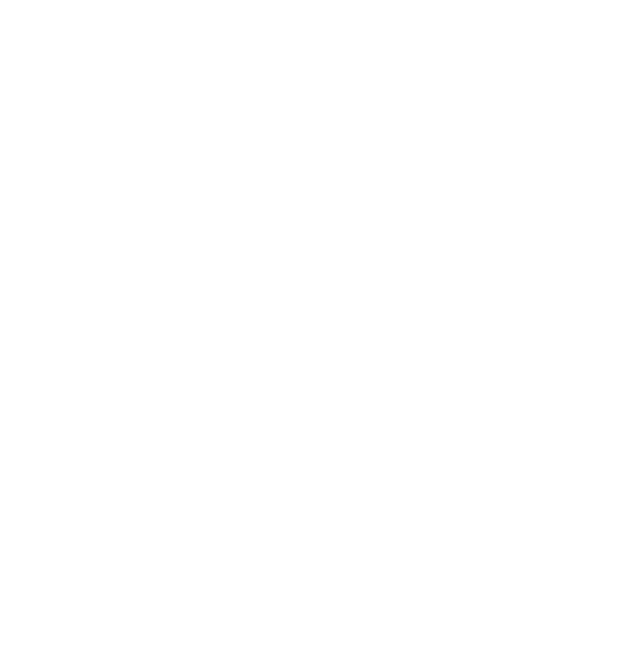

In [70]:
bwr = plt.cm.get_cmap('Reds')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]
classes = bins_q5.yb
choropleth(classes, c5, reader)

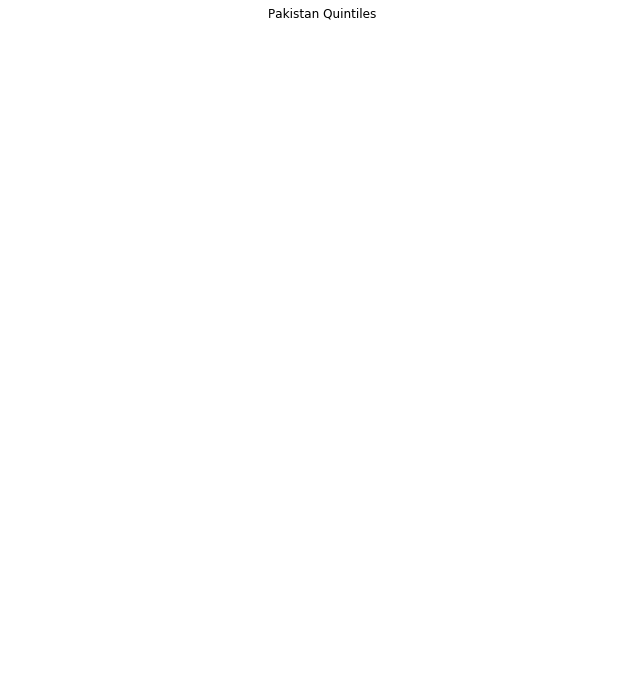

In [71]:
choropleth(classes, c5, reader, title="Pakistan Quintiles")

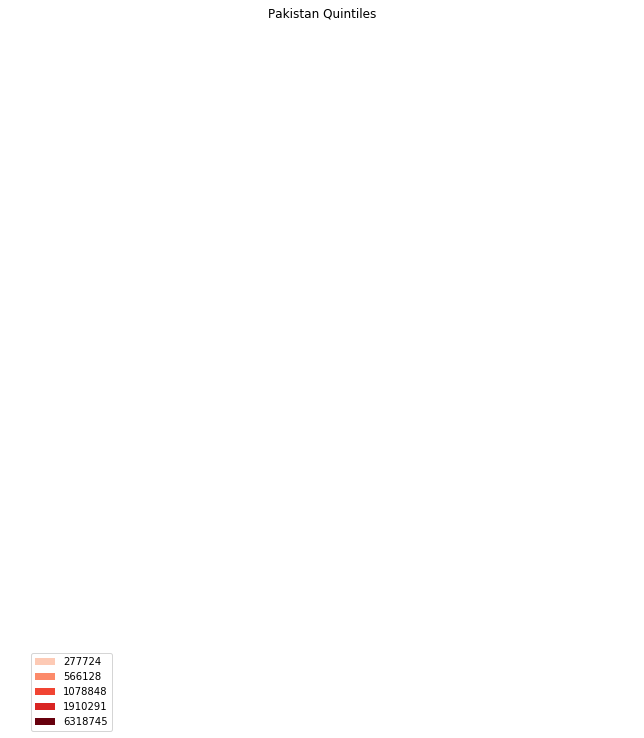

In [72]:
legend =[ "%3d"%ub for ub in bins_q5.bins]
choropleth(classes, c5, reader, legend, title="Pakistan Quintiles")

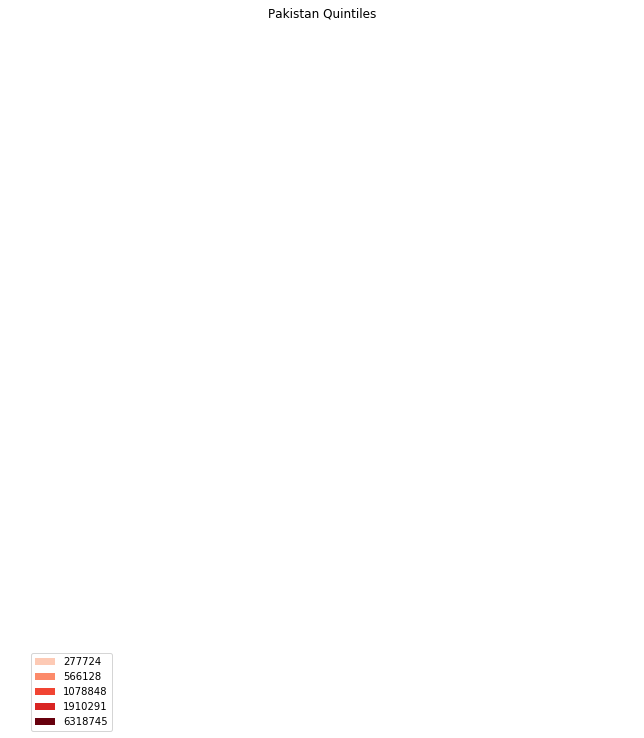

In [73]:
def choropleth(classes, colors, reader, legend=None, title=None, fileName=None, dpi=600):
    f, ax = plt.subplots(1, figsize=(9,9))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axison=False
    
    ax = plt.axes([0,0,1,1], projection=ccrs.LambertConformal())
    ax.set_extent([-108, -93, 38, 24], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    if title:
        plt.title(title)
    ax.set_extent([-108, -93, 38, 24], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    for i,state in enumerate(reader.geometries()):
        facecolor = colors[classes[i]]
        #facecolor = 'red'
        edgecolor = 'black'
        ax.add_geometries([state], ccrs.PlateCarree(), 
                         facecolor=facecolor, edgecolor=edgecolor)
    
        
    leg = [ mpatches.Rectangle((0,0),1,1, facecolor=color) for color in colors]
    if legend:
        plt.legend(leg, legend, loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)
    if fileName:
        plt.savefig(fileName, dpi=dpi)
    #ax.set_axis_off()
    plt.show()

legend =[ "%3d"%ub for ub in bins_q5.bins]
choropleth(classes, c5, reader, legend, title="Pakistan Quintiles")

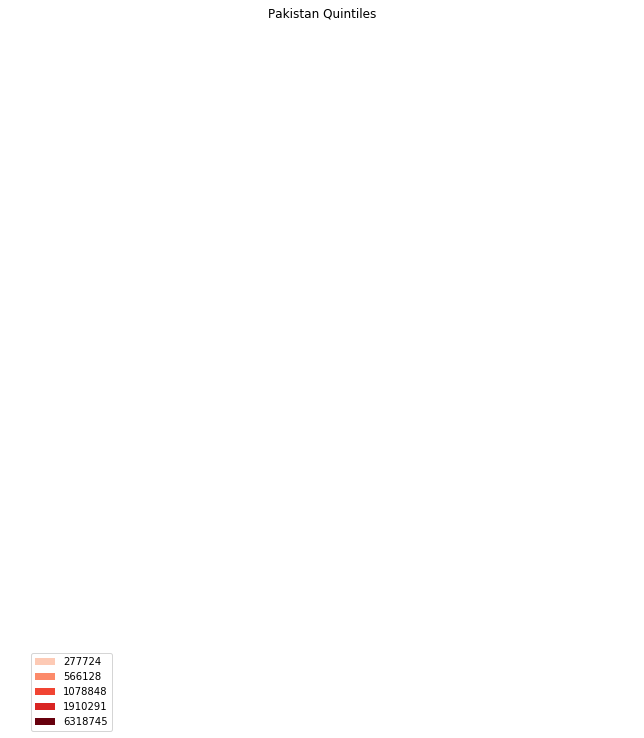

In [77]:
legend =[ "%3d"%ub for ub in bins_q5.bins]
choropleth(classes, c5, reader, legend, title="Pakistan Quintiles")

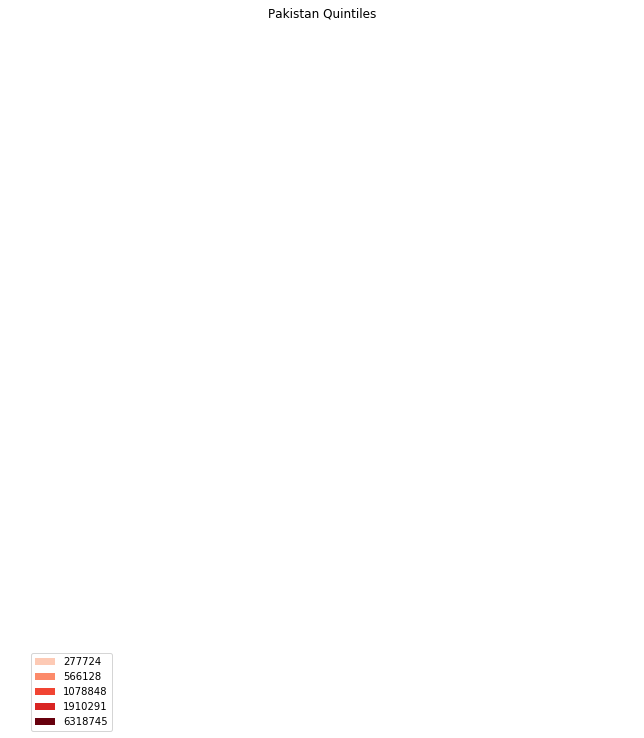

In [78]:
def choropleth(classes, colors, reader, legend=None, title=None, fileName=None, dpi=600):
    f, ax = plt.subplots(1, figsize=(9,9), frameon=False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axison=False
    
    
    ax = plt.axes([0,0,1,1], projection=ccrs.LambertConformal())
    ax.set_extent([-108, -93, 38, 24], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    
    if title:
        plt.title(title)

    for i,state in enumerate(reader.geometries()):
        facecolor = colors[classes[i]]
        edgecolor = 'white'
        ax.add_geometries([state], ccrs.PlateCarree(), 
                         facecolor=facecolor, edgecolor=edgecolor)
    
        
    leg = [ mpatches.Rectangle((0,0),1,1, facecolor=color) for color in colors]
    if legend:
        plt.legend(leg, legend, loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)
    if fileName:
        plt.savefig(fileName, dpi=dpi)
    plt.show()

legend =[ "%3d"%ub for ub in bins_q5.bins]
choropleth(classes, c5, reader, legend, title="Pakistan Quintiles")

For an example publication and code where Cartopy was used for the mapping see: [Rey (2016)](https://github.com/sjsrey/limaaag).

## Bokeh

[website](http://bokeh.pydata.org/en/latest/)

In [79]:
from collections import OrderedDict

#from bokeh.sampledata import us_counties, unemployment
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.models import HoverTool

from bokeh.charts import Scatter, output_file, show

In [80]:
def gpd_bokeh(df):
    """Convert geometries from geopandas to bokeh format"""
    nan = float('nan')
    lons = []
    lats = []
    for i,shape in enumerate(df.geometry.values):
        if shape.geom_type == 'MultiPolygon':
            gx = []
            gy = []
            ng = len(shape.geoms) - 1
            for j,member in enumerate(shape.geoms):
                xy = np.array(list(member.exterior.coords))
                xs = xy[:,0].tolist()
                ys = xy[:,1].tolist()
                gx.extend(xs)
                gy.extend(ys)
                if j < ng:
                    gx.append(nan)
                    gy.append(nan)
            lons.append(gx)
            lats.append(gy)
                
        else:     
            xy = np.array(list(shape.exterior.coords))
            xs = xy[:,0].tolist()
            ys = xy[:,1].tolist()
            lons.append(xs)
            lats.append(ys) 

    return lons,lats

In [81]:
lons, lats = gpd_bokeh(tx)

In [94]:
p = figure(title="Pakistan", toolbar_location='left',
          plot_width=1100, plot_height=700)
p.patches(lons, lats, fill_alpha=0.7, #fill_color=state_colors,
         line_color="#884444", line_width=2, line_alpha=0.3)
output_file('choropleth.html', title="choropleth.py example")
show(p)

INFO:bokeh.core.state:Session output file 'choropleth.html' already exists, will be overwritten.


In [95]:
bwr = plt.cm.get_cmap('Reds')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]
classes = bins_q5.yb
colors = [c5[i] for i in classes]


In [96]:
colors5 = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77"]
colors = [colors5[i] for i in classes]

p = figure(title="Pakistan", toolbar_location='left',
          plot_width=1100, plot_height=700)
p.patches(lons, lats, fill_alpha=0.7, fill_color=colors,
         line_color="#884444", line_width=2, line_alpha=0.3)
output_file('choropleth.html', title="choropleth.py example")
show(p)

INFO:bokeh.core.state:Session output file 'choropleth.html' already exists, will be overwritten.


### Hover 



In [97]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_file, ColumnDataSource

In [101]:
source = ColumnDataSource(data=dict(
        x=lons,
        y=lats,
        color=colors,
        name=tx.NAME_3,
        rate=Area
    ))

TOOLS = "pan, wheel_zoom, box_zoom, reset, hover, save"
p = figure(title="Pakistan Area (Quintiles)", tools=TOOLS,
          plot_width=900, plot_height=900)

p.patches('x', 'y', source=source,
         fill_color='color', fill_alpha=0.7,
         line_color='white', line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = 'follow_mouse'
hover.tooltips = [
    ("Name", "@name"),
    ("Area", "@rate"),
    ("(Long, Lat)", "($x, $y)"),
]


output_file("Pakistan.html", title="Pakistan.py example")
show(p)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
